In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('Raw_Data.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column not in ['Anxiety Label', 'Stress Label', 'Depression Label']:  # Exclude target variables
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Normalize/scale numerical data
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['int64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the first few rows after preprocessing
print(data.head())

  1. Age 2. Gender                             3. University  \
0  18-22    Female  Independent University, Bangladesh (IUB)   
1  18-22      Male  Independent University, Bangladesh (IUB)   
2  18-22      Male  Independent University, Bangladesh (IUB)   
3  18-22      Male  Independent University, Bangladesh (IUB)   
4  18-22      Male  Independent University, Bangladesh (IUB)   

                                  4. Department           5. Academic Year  \
0  Engineering - CS / CSE / CSC / Similar to CS  Fourth Year or Equivalent   
1  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
2  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
3  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
4  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   

  6. Current CGPA  \
0     2.50 - 2.99   
1     3.80 - 4.00   
2     3.00 - 3.39   
3     3.40 - 3.79   
4     3.40 - 3.79   

  7. Did you receiv

            1. Age    2. Gender  3. University  4. Department  \
count  1977.000000  1977.000000    1977.000000    1977.000000   
mean      0.377339     0.704097       5.595346       2.545271   
std       0.541078     0.467516       3.752885       1.938346   
min       0.000000     0.000000       0.000000       0.000000   
25%       0.000000     0.000000       0.000000       2.000000   
50%       0.000000     1.000000       8.000000       2.000000   
75%       1.000000     1.000000       8.000000       2.000000   
max       4.000000     2.000000      14.000000      11.000000   

       5. Academic Year  6. Current CGPA  \
count       1977.000000      1977.000000   
mean           1.948407         1.795144   
std            1.642788         1.428816   
min            0.000000         0.000000   
25%            0.000000         1.000000   
50%            2.000000         2.000000   
75%            4.000000         2.000000   
max            4.000000         5.000000   

       7. Did you

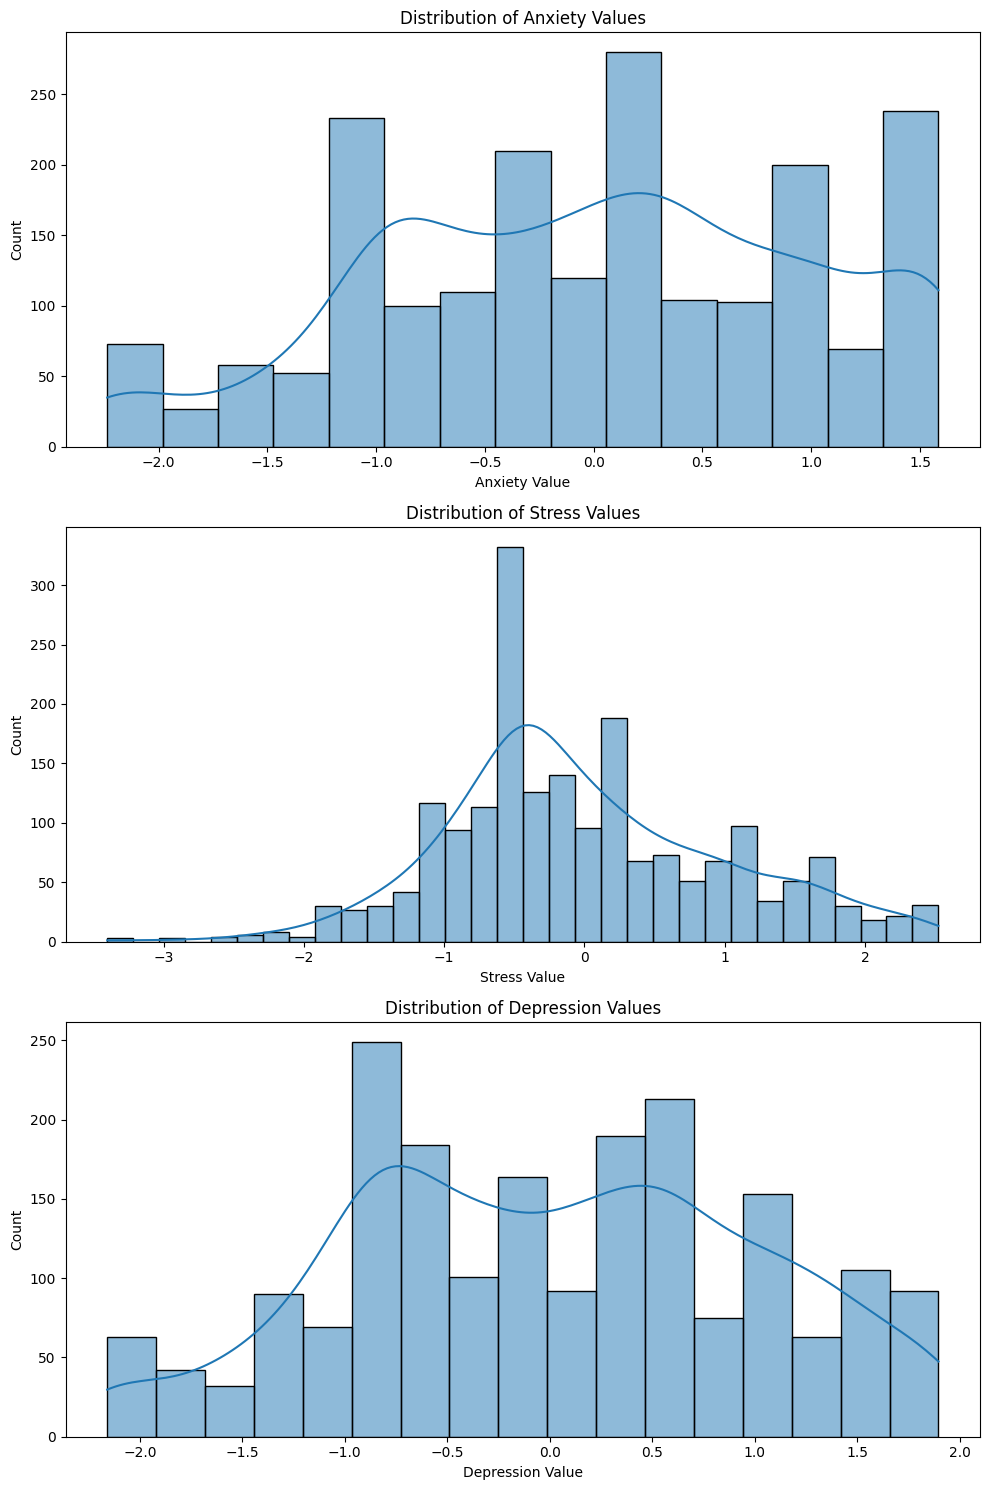

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Summary statistics
print(data.describe())

# Distribution plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data['Anxiety Value'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Anxiety Values')

sns.histplot(data['Stress Value'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of Stress Values')

sns.histplot(data['Depression Value'], ax=axes[2], kde=True)
axes[2].set_title('Distribution of Depression Values')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features and target variables
X = data.drop(columns=['Anxiety Label', 'Stress Label', 'Depression Label'])
y_anxiety = data['Anxiety Label']
y_stress = data['Stress Label']
y_depression = data['Depression Label']

# Split the data into training and test sets
X_train, X_test, y_train_anxiety, y_test_anxiety = train_test_split(X, y_anxiety, test_size=0.2, random_state=42)
X_train, X_test, y_train_stress, y_test_stress = train_test_split(X, y_stress, test_size=0.2, random_state=42)
X_train, X_test, y_train_depression, y_test_depression = train_test_split(X, y_depression, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Evaluate models using cross-validation
models = {'Logistic Regression': log_reg, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    print(f"Evaluating {name} for Anxiety Prediction")
    scores = cross_val_score(model, X_train, y_train_anxiety, cv=5)
    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

    print(f"Evaluating {name} for Stress Prediction")
    scores = cross_val_score(model, X_train, y_train_stress, cv=5)
    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

    print(f"Evaluating {name} for Depression Prediction")
    scores = cross_val_score(model, X_train, y_train_depression, cv=5)
    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# Train and evaluate the best model (Random Forest in this case)
best_model = rf
best_model.fit(X_train, y_train_anxiety)
y_pred_anxiety = best_model.predict(X_test)
print("Classification Report for Anxiety Prediction:")
print(classification_report(y_test_anxiety, y_pred_anxiety))

best_model.fit(X_train, y_train_stress)
y_pred_stress = best_model.predict(X_test)
print("Classification Report for Stress Prediction:")
print(classification_report(y_test_stress, y_pred_stress))

best_model.fit(X_train, y_train_depression)
y_pred_depression = best_model.predict(X_test)
print("Classification Report for Depression Prediction:")
print(classification_report(y_test_depression, y_pred_depression))

Evaluating Logistic Regression for Anxiety Prediction
Accuracy: 0.97 (+/- 0.01)
Evaluating Logistic Regression for Stress Prediction
Accuracy: 0.98 (+/- 0.02)
Evaluating Logistic Regression for Depression Prediction
Accuracy: 0.93 (+/- 0.04)
Evaluating Decision Tree for Anxiety Prediction
Accuracy: 1.00 (+/- 0.00)
Evaluating Decision Tree for Stress Prediction
Accuracy: 1.00 (+/- 0.00)
Evaluating Decision Tree for Depression Prediction
Accuracy: 1.00 (+/- 0.00)
Evaluating Random Forest for Anxiety Prediction
Accuracy: 1.00 (+/- 0.00)
Evaluating Random Forest for Stress Prediction
Accuracy: 1.00 (+/- 0.00)
Evaluating Random Forest for Depression Prediction
Accuracy: 0.99 (+/- 0.00)
Classification Report for Anxiety Prediction:
                  precision    recall  f1-score   support

    Mild Anxiety       1.00      1.00      1.00        99
 Minimal Anxiety       1.00      1.00      1.00        25
Moderate Anxiety       1.00      1.00      1.00       122
  Severe Anxiety       1.00    

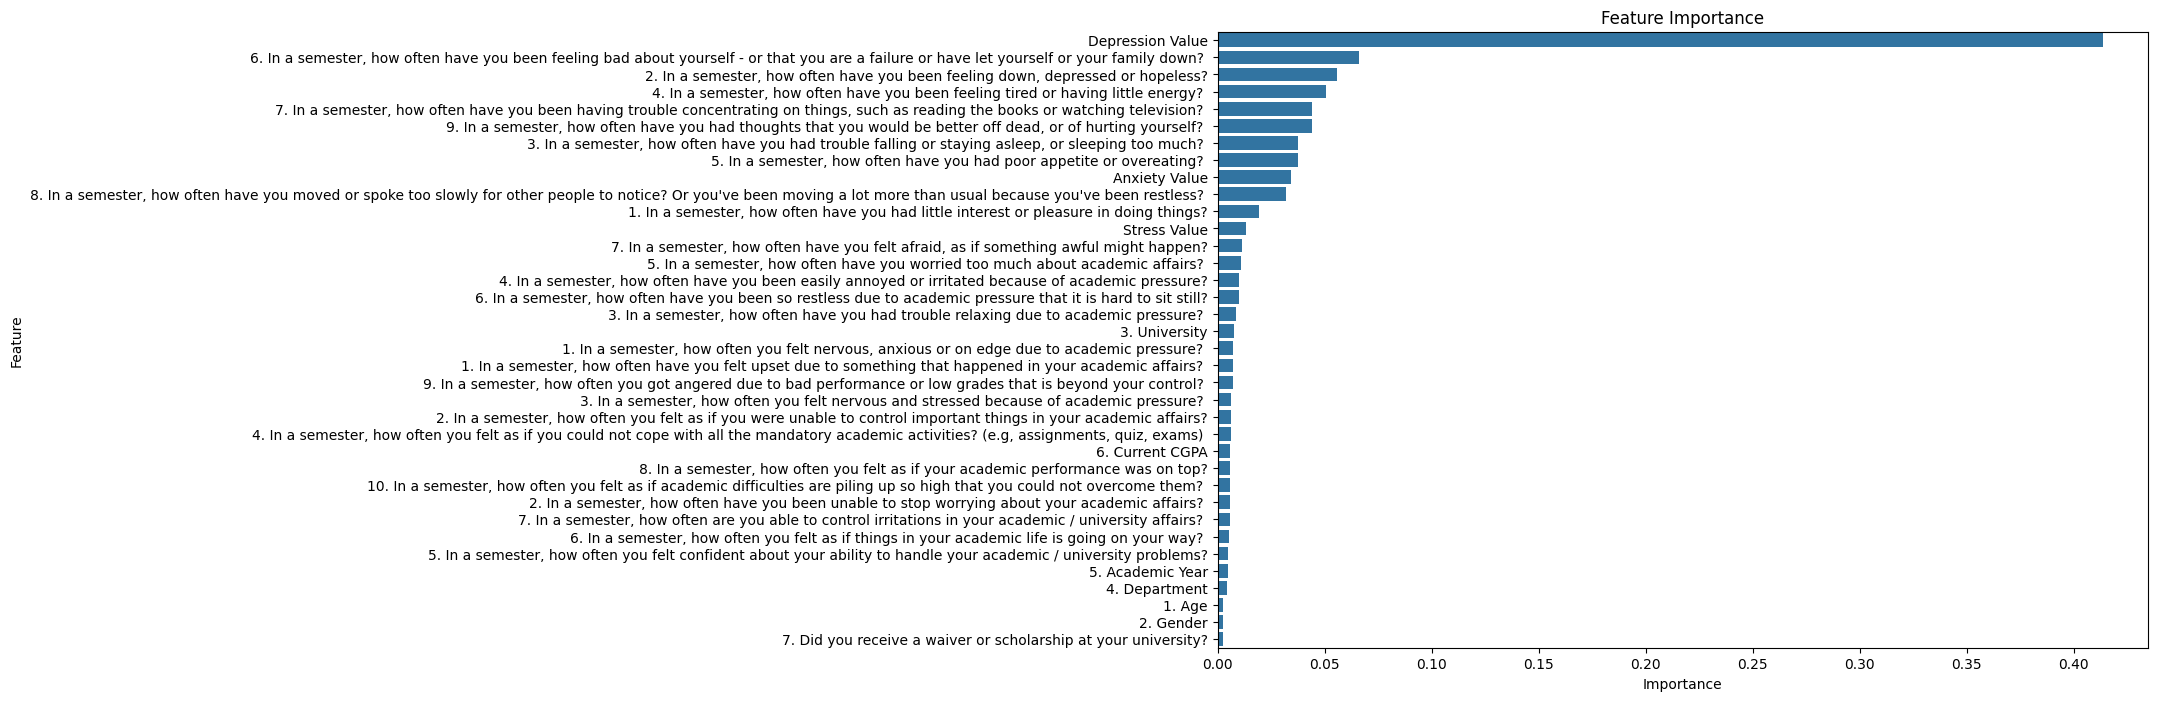

In [5]:
# Feature importance
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()